In [ ]:
!python --version

Python 3.7.3


In [ ]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


Let's count the null values in the dataset

In [ ]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

To get a better picture of the null values in the data, let's calculate the percentage of null values in each column. Below, we divide the number of null values in each column by the total number of values in the data set:

In [ ]:
null_counts_pct = null_counts / mvc.shape[0] * 100

We'll then add both the counts and percentages to a dataframe to make them easier to compare:

In [ ]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})

null_df = null_df.T.astype(int)

null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%!

To make things easier, let's start by looking at the group of columns that relate to people killed in collisions.

We'll use list comprehension to reduce our summary dataframe to just those columns:

In [ ]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [ ]:
killed = mvc[killed_cols].copy()

In [ ]:
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed['total_killed'] != killed_manual_sum
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [ ]:
import numpy as np

In [ ]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [ ]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [ ]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [ ]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

In [ ]:
!pip install seaborn

     |████████████████████████████████| 225kB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

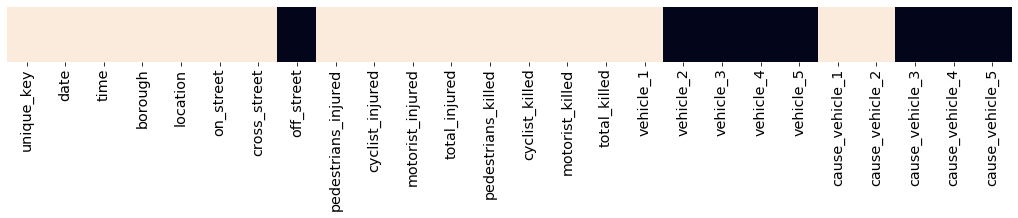

In [ ]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

Each value is represented by a dark square, and each missing value is represented by a light square.

Let's look at what a plot matrix looks like for the whole dataframe:

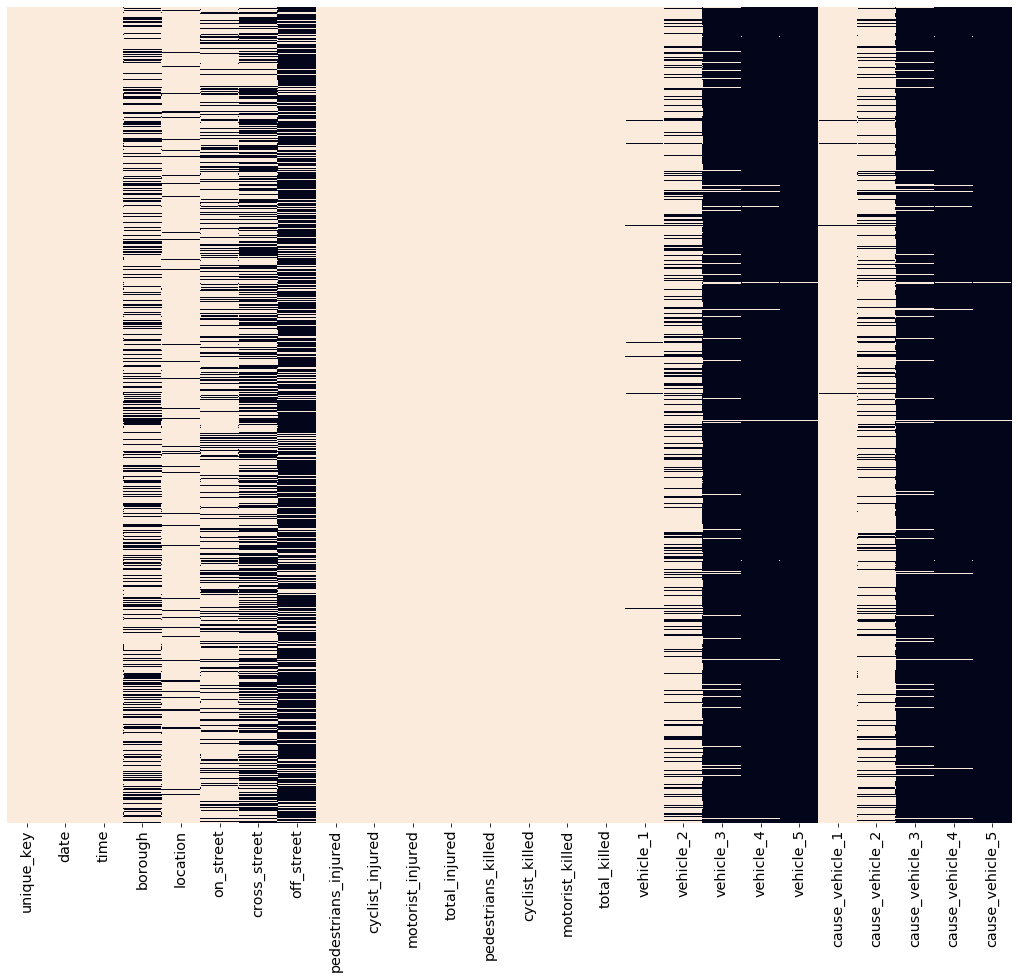

In [ ]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

- The first three columns have few to no missing values.
- The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
- The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
- The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as correlation.

In [ ]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


 Let's create a correlation plot of just those last 10 columns to see if we can more closely identify the pattern we saw earlier in the matrix plot.

In [ ]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    

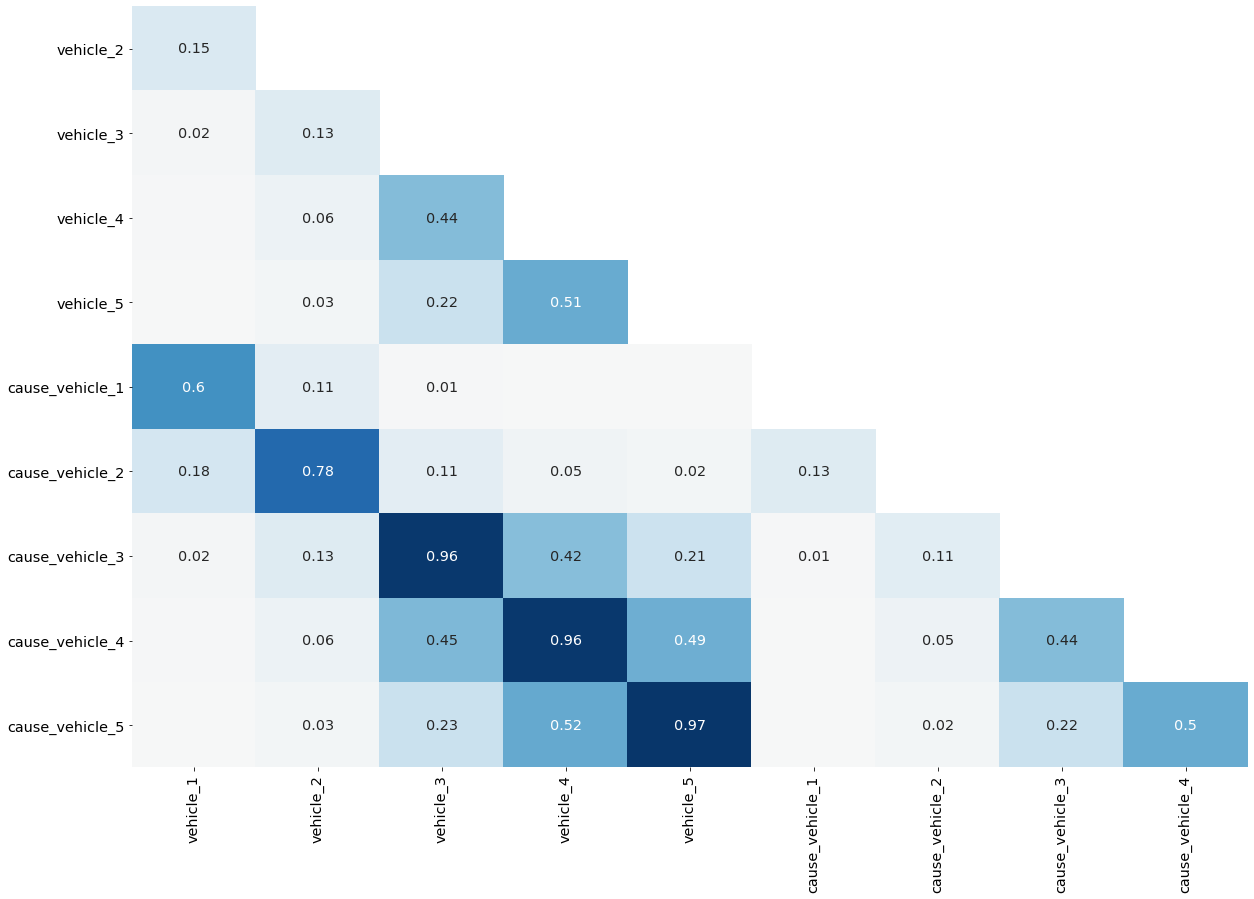

In [ ]:
veh_cols = [col for col in mvc.columns if 'vehicle' in col]    
plot_null_correlations(mvc[veh_cols])

The pairs of column names that make up these five correlations are:

- vehicle_1 and cause_vehicle_1
- vehicle_2 and cause_vehicle_2
- vehicle_3 and cause_vehicle_3
- vehicle_4 and cause_vehicle_4
- vehicle_5 and cause_vehicle_5

In [ ]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[v_col].notnull() & mvc[c_col].isnull()).sum()
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels) 
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


The analysis we did on the previous screen indicates that there are roughly 4,500 missing values across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean losing almost 10% of the total data, which is something we ideally want to avoid.

A better option is to impute the data, like we did earlier. Because the data in these columns is text data, we can't perform a numeric calculation to impute missing data like we did with the injuries and killed columns.

In [ ]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [ ]:
cause_1d = cause.stack()
cause_1d.head()

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

In [ ]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [ ]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicle = mvc[v_cols]
vehicles_1d = vehicle.stack()
top10_vehicles = vehicles_1d.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [ ]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

In [ ]:
summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [ ]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = (mvc[v_col].isnull() & mvc[c_col].notnull())
    c_missing_mask = (mvc[c_col].isnull() & mvc[v_col].notnull())
    mvc[v_col][v_missing_mask] = "Unspecified"
    mvc[c_col][c_missing_mask] = "Unspecified"

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
summary_after = summarize_missing() 
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


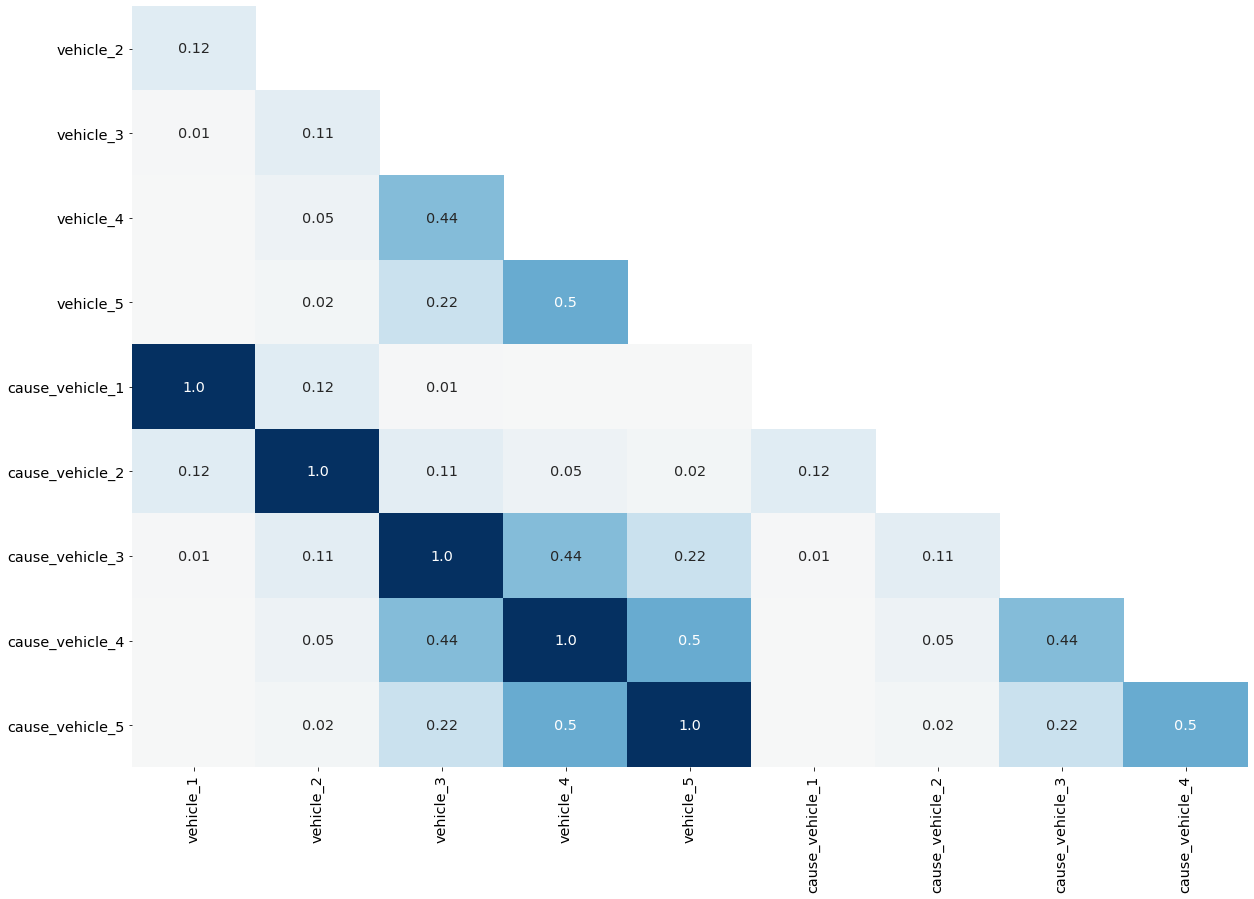

In [ ]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [ ]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [ ]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

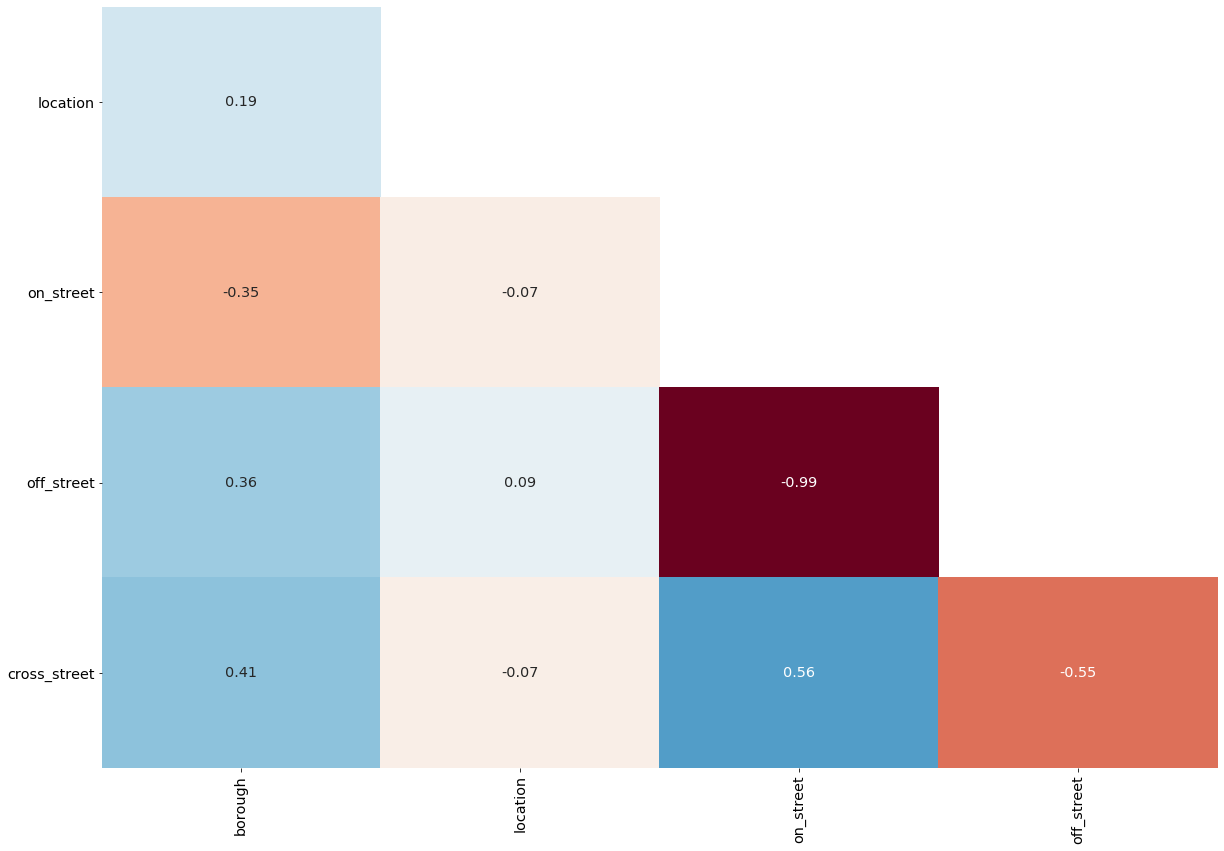

In [ ]:
plot_null_correlations(location_data)

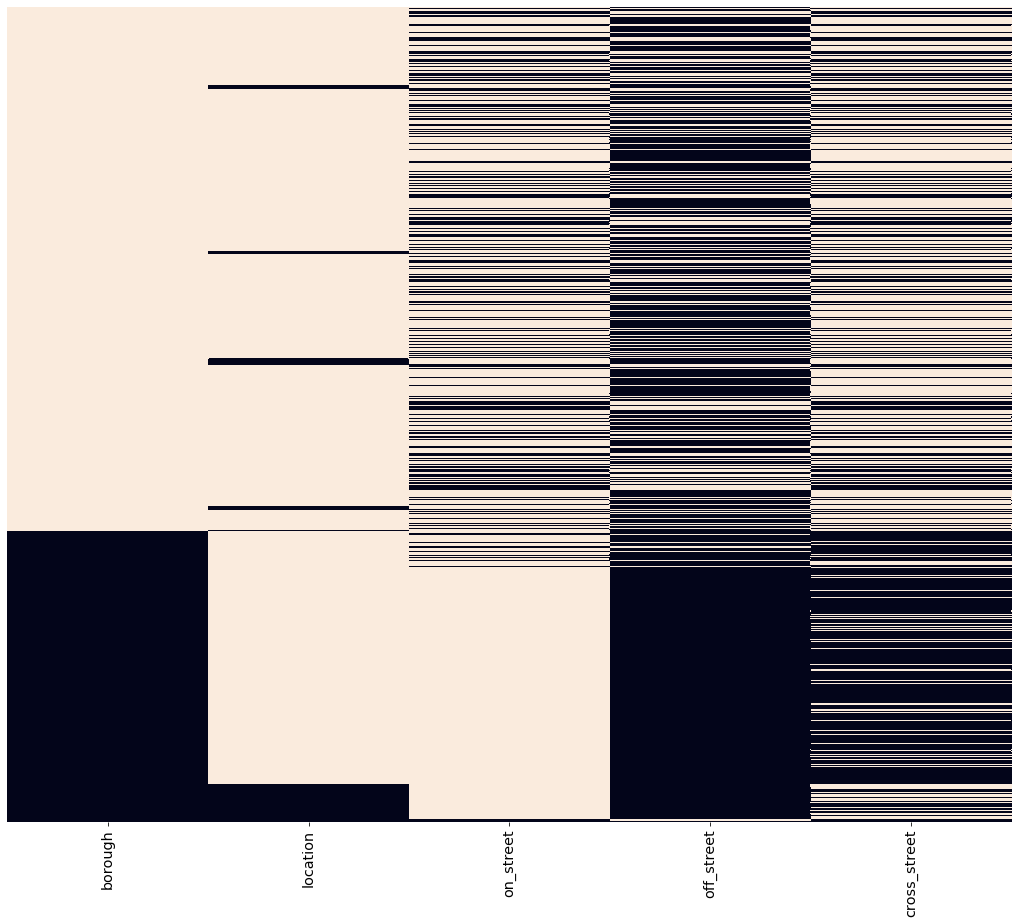

In [ ]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

In [ ]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [ ]:
for location in location_cols:
    mvc[location] = mvc[location].mask(mvc[location].isnull(), sup_data[location])
    
null_after = mvc[location_cols].isnull().sum() 
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64